In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN as sklearn_DBSCAN

from utils import timer, DBSCAN, show_scatter_plot, calculate_metrics, plot_epsilon_research
import platform
from math import hypot
from numpy import random

C:\ProgramData\Anaconda3\envs\ba-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
RANDOM_STATE = 42
DISTANCE = lambda x_, y_: hypot(x_[0] - y_[0], x_[1] - y_[1])

In [3]:
my_system = platform.uname()
print(f"System: {my_system.system}")
print(f"Release: {my_system.release}")
print(f"Version: {my_system.version}")
print(f"Machine: {my_system.machine}")
print(f"Processor: {my_system.processor}")

System: Windows
Release: 10
Version: 10.0.19041
Machine: AMD64
Processor: Intel64 Family 6 Model 142 Stepping 12, GenuineIntel


# Main function

In [4]:
def make_experiment(x, y, eps, min_pts, n_centers, min_eps, max_eps, metrics_df):
    x = MinMaxScaler(feature_range=(0, 1)).fit_transform(x)
    plot_epsilon_research(x, y1=min_eps, y2=max_eps)
    show_scatter_plot(x, y, title_text='Real clusterization')
    random.seed(RANDOM_STATE)
    # train model
    model = DBSCAN(eps=eps, min_pts=min_pts, distance=DISTANCE)
    model.fit(list(map((lambda x: tuple(x)), x.tolist())))
    clusters = model.clusters_
    data = pd.DataFrame(columns=['n_cluster', 'x', 'y'])
    # add noise clusters
    temp_data = pd.DataFrame(model.noise_clusters_, columns=['x', 'y'])
    temp_data['n_cluster'] = 0
    data = data.append(temp_data, ignore_index=True)
    # add clusters
    for n_cluster in clusters.keys():
        temp_data=pd.DataFrame(clusters[n_cluster], columns=['x', 'y'])
        temp_data['n_cluster'] = n_cluster
        data = data.append(temp_data, ignore_index=True)
    data['n_cluster'] = data['n_cluster'].astype('int')
    sns.scatterplot(data=data, x='x', y='y', hue='n_cluster', palette="Set1", s=50, legend='full')
    plt.show()
    # calculate metrics
    result_df = pd.DataFrame(x, index=y, columns=['x', 'y']).reset_index()
    result_df = result_df.rename({'index': 'real_cluster'}, axis=1)
    data = data.rename({'n_cluster': 'pred_cluster'}, axis=1)
    result_df = result_df.merge(data, how='inner', on=['x', 'y'])
    del data

    metrics_df = metrics_df.append(calculate_metrics(n_clusters=len(result_df[result_df['pred_cluster'] != 0]['pred_cluster'].unique()),
                                                     n_noise=result_df[result_df['pred_cluster'] == 0].shape[0],
                                                     labels_true=result_df['real_cluster'],
                                                     labels=result_df['pred_cluster'],
                                                     X=result_df[['x', 'y']],
                                                     return_dataframe=True))

    return metrics_df

In [5]:
metrics_df = pd.DataFrame(columns=[
    '№',
    'homogeneity',
    'completeness_score',
    'v_measure_score',
    'adjusted_rand_score',
    'adjusted_mutual_info_score',
    'silhouette_score'
])

# make_blobs test

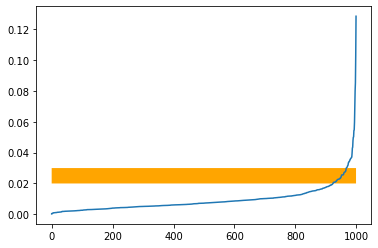

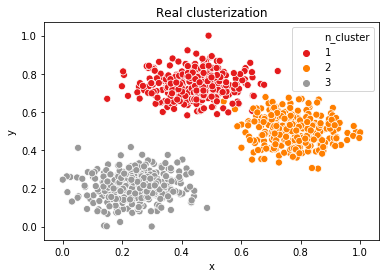

Function 'fit' is done. Elapsed: 0.35 sec.


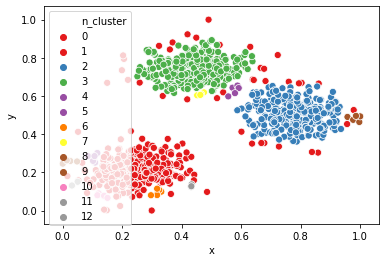

Estimated number of clusters: 12
Estimated number of noise points: 57
Homogeneity: 0.924
Completeness: 0.693
V-measure: 0.792
Adjusted Rand Index: 0.844
Adjusted Mutual Information: 0.790
Silhouette Coefficient: 0.078


In [6]:
eps, min_pts = 0.03, 3
n_centers = 3
min_eps, max_eps = 0.02, 0.03
params = {
    'n_samples': 1000,
    'centers': n_centers,
    'cluster_std': 2.,
    'n_features': 2,
    'random_state': RANDOM_STATE,
    'return_centers': False
}
x, y = make_blobs(**params)

metrics_df = make_experiment(x, y, eps, min_pts, n_centers, min_eps, max_eps, metrics_df)

# make_circles test

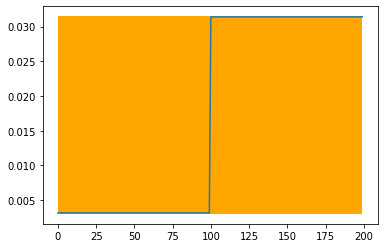

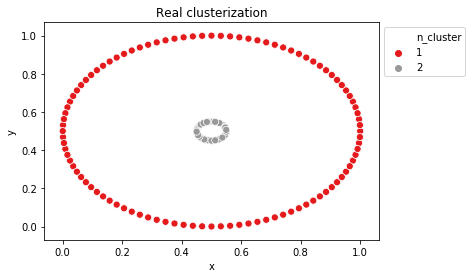

Function 'fit' is done. Elapsed: 0.00 sec.


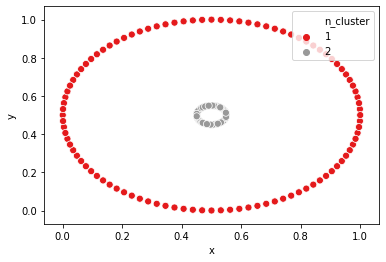

Estimated number of clusters: 2
Estimated number of noise points: 0
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.326


In [7]:
eps, min_pts = 0.1, 3
n_centers = 2
min_eps, max_eps = 0.003, 0.0315


params = {
    'n_samples': 200,
    'factor': 0.1,
    'noise': .0,
    'random_state': RANDOM_STATE
}
x, y = make_circles(**params)

metrics_df = make_experiment(x, y, eps, min_pts, n_centers, min_eps, max_eps, metrics_df)

# make_moons test

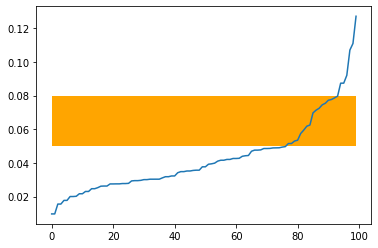

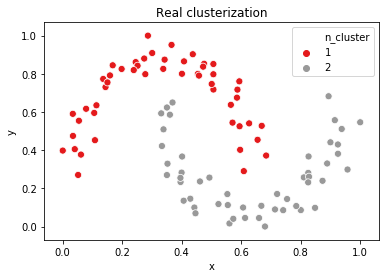

Function 'fit' is done. Elapsed: 0.00 sec.


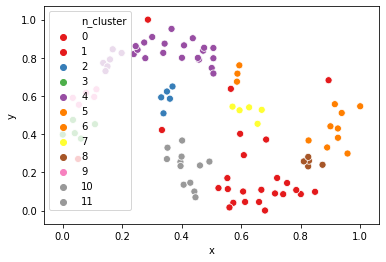

Estimated number of clusters: 11
Estimated number of noise points: 8
Homogeneity: 0.935
Completeness: 0.287
V-measure: 0.440
Adjusted Rand Index: 0.242
Adjusted Mutual Information: 0.415
Silhouette Coefficient: 0.285


In [8]:
eps, min_pts = 0.08, 3
n_centers = 2
min_eps, max_eps = 0.05, 0.08

params = {
    'n_samples': 100,
    'noise': .1,
    'random_state': RANDOM_STATE
}
x, y = make_moons(**params)

metrics_df = make_experiment(x, y, eps, min_pts, n_centers, min_eps, max_eps, metrics_df)

# Bonus: test with outliers

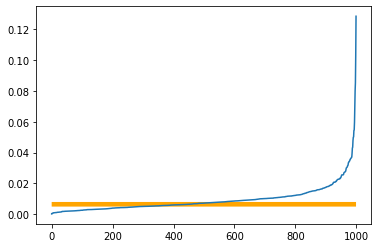

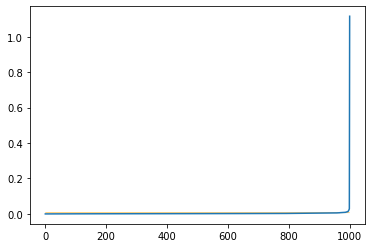

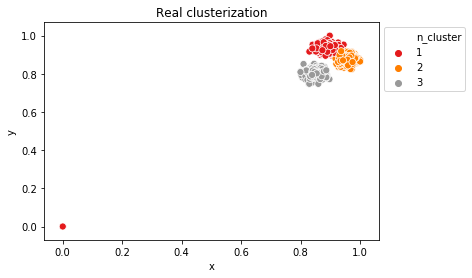

Function 'fit' is done. Elapsed: 0.98 sec.


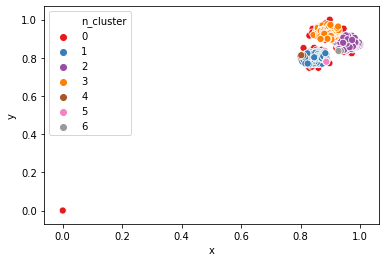

Estimated number of clusters: 6
Estimated number of noise points: 33
Homogeneity: 0.948
Completeness: 0.824
V-measure: 0.882
Adjusted Rand Index: 0.923
Adjusted Mutual Information: 0.881
Silhouette Coefficient: 0.364


In [9]:
eps, min_pts = 0.008, 3
n_centers = 3
min_eps, max_eps = 0.005, 0.008

params = {
    'n_samples': 1000,
    'centers': n_centers,
    'cluster_std': 2.,
    'n_features': 2,
    'random_state': RANDOM_STATE,
    'return_centers': False
}
x, y = make_blobs(**params)
x = np.append(x, [[-100., -100.]], axis=0)
y = np.append(y, [0])
plot_epsilon_research(MinMaxScaler(feature_range=(0, 1)).fit_transform(x[:1000,]), y1=min_eps, y2=max_eps)

metrics_df = make_experiment(x, y, eps, min_pts, n_centers, min_eps, max_eps, metrics_df)

In [14]:
metrics_df.reset_index(drop=True, inplace=True)
for idx in range(metrics_df.shape[0]):
    metrics_df.iloc[idx, 0] = idx + 1
metrics_df

№  homogeneity  completeness_score  v_measure_score  adjusted_rand_score  \
0  1     0.924309            0.692937         0.792072             0.843639   
1  2     1.000000            1.000000         1.000000             1.000000   
2  3     0.935098            0.287409         0.439679             0.241913   
3  4     0.947539            0.824396         0.881688             0.923403   

   adjusted_mutual_info_score  silhouette_score  
0                    0.789753          0.077536  
1                    1.000000          0.325637  
2                    0.414714          0.285217  
3                    0.880996          0.363555

# Different_params research

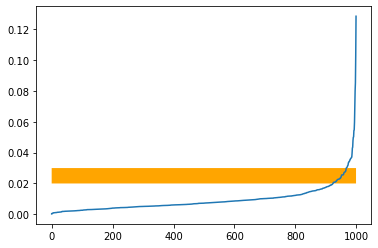

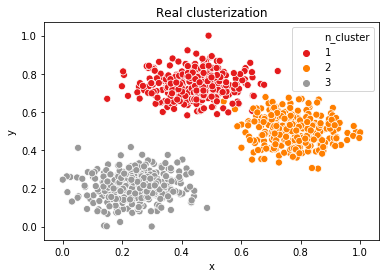

eps = 0.03
min_pts = 3


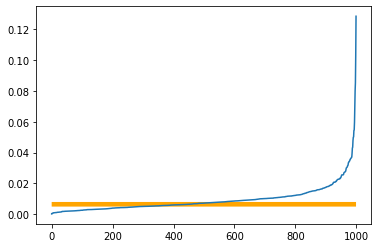

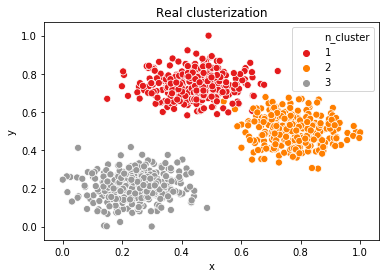

Function 'fit' is done. Elapsed: 0.94 sec.


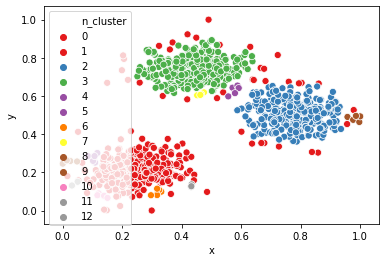

Estimated number of clusters: 12
Estimated number of noise points: 57
Homogeneity: 0.924
Completeness: 0.693
V-measure: 0.792
Adjusted Rand Index: 0.844
Adjusted Mutual Information: 0.790
Silhouette Coefficient: 0.078
min_pts = 5


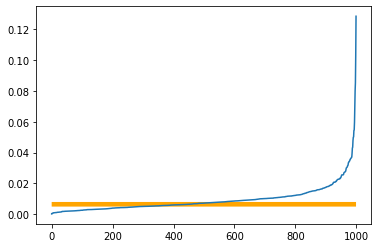

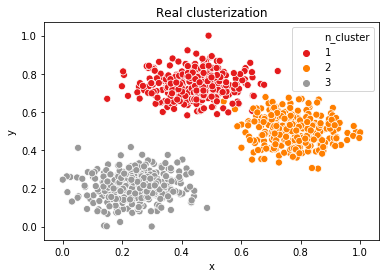

Function 'fit' is done. Elapsed: 0.94 sec.


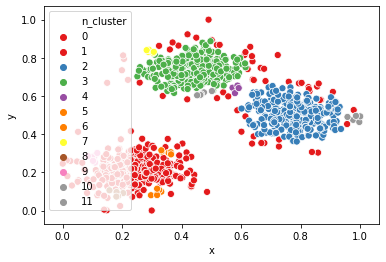

Estimated number of clusters: 11
Estimated number of noise points: 100
Homogeneity: 0.883
Completeness: 0.635
V-measure: 0.739
Adjusted Rand Index: 0.774
Adjusted Mutual Information: 0.736
Silhouette Coefficient: -0.012
min_pts = 7


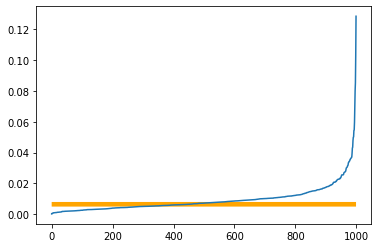

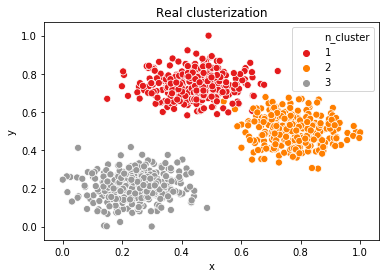

Function 'fit' is done. Elapsed: 0.97 sec.


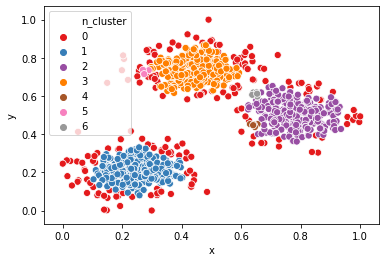

Estimated number of clusters: 6
Estimated number of noise points: 179
Homogeneity: 0.818
Completeness: 0.625
V-measure: 0.709
Adjusted Rand Index: 0.698
Adjusted Mutual Information: 0.708
Silhouette Coefficient: 0.187
min_pts = 9


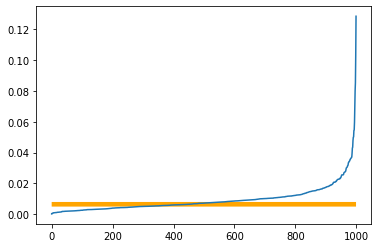

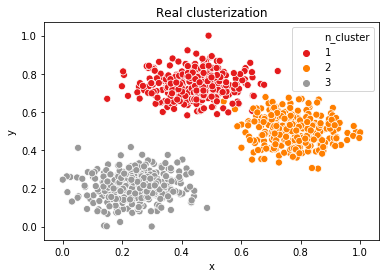

Function 'fit' is done. Elapsed: 0.94 sec.


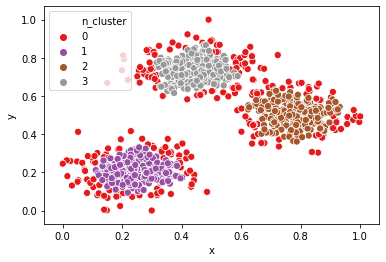

Estimated number of clusters: 3
Estimated number of noise points: 233
Homogeneity: 0.763
Completeness: 0.605
V-measure: 0.675
Adjusted Rand Index: 0.626
Adjusted Mutual Information: 0.674
Silhouette Coefficient: 0.428
eps = 0.05
min_pts = 3


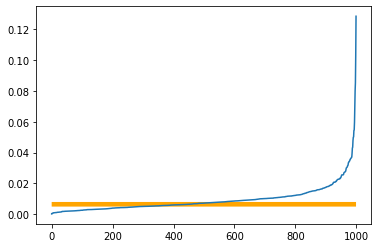

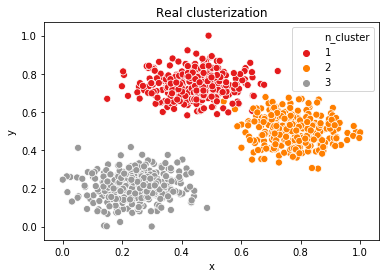

Function 'fit' is done. Elapsed: 0.94 sec.


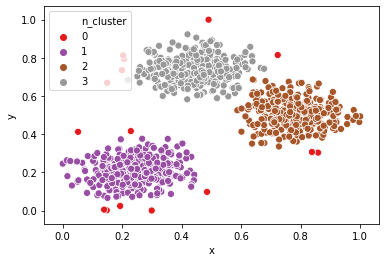

Estimated number of clusters: 3
Estimated number of noise points: 15
Homogeneity: 0.956
Completeness: 0.905
V-measure: 0.930
Adjusted Rand Index: 0.960
Adjusted Mutual Information: 0.930
Silhouette Coefficient: 0.656
min_pts = 5


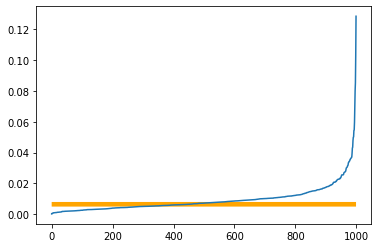

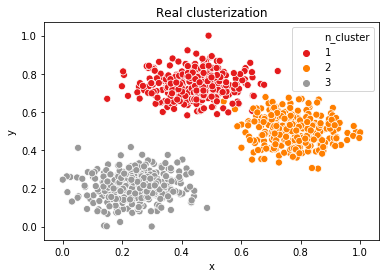

Function 'fit' is done. Elapsed: 0.96 sec.


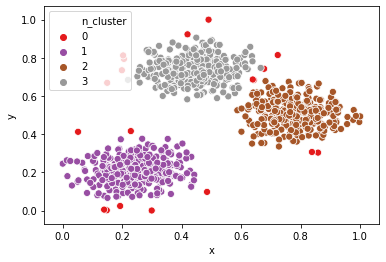

Estimated number of clusters: 3
Estimated number of noise points: 19
Homogeneity: 0.962
Completeness: 0.901
V-measure: 0.931
Adjusted Rand Index: 0.960
Adjusted Mutual Information: 0.930
Silhouette Coefficient: 0.661
min_pts = 7


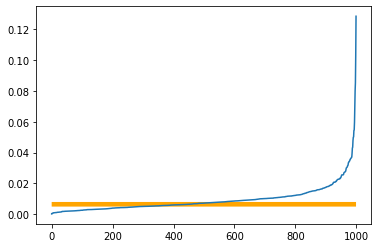

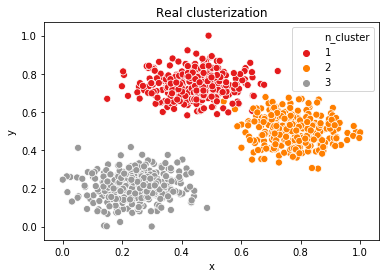

Function 'fit' is done. Elapsed: 0.99 sec.


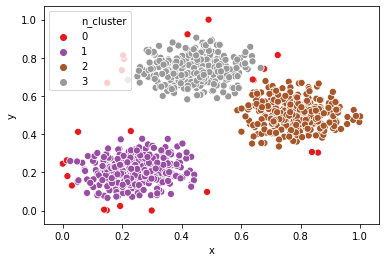

Estimated number of clusters: 3
Estimated number of noise points: 23
Homogeneity: 0.958
Completeness: 0.890
V-measure: 0.923
Adjusted Rand Index: 0.953
Adjusted Mutual Information: 0.923
Silhouette Coefficient: 0.652
min_pts = 9


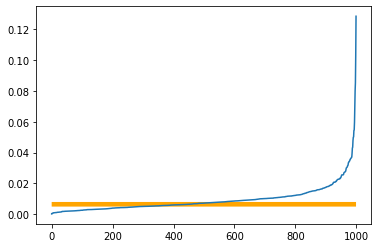

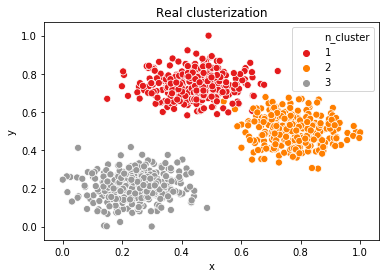

Function 'fit' is done. Elapsed: 0.98 sec.


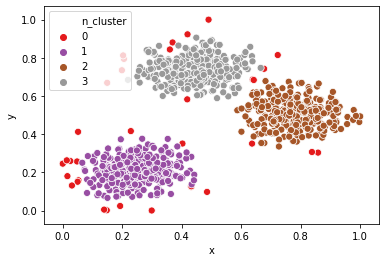

Estimated number of clusters: 3
Estimated number of noise points: 34
Homogeneity: 0.949
Completeness: 0.862
V-measure: 0.904
Adjusted Rand Index: 0.937
Adjusted Mutual Information: 0.904
Silhouette Coefficient: 0.634
eps = 0.1
min_pts = 3


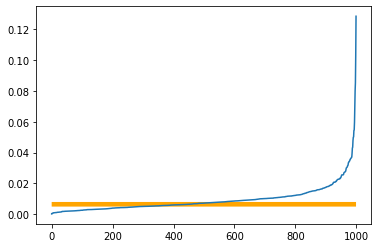

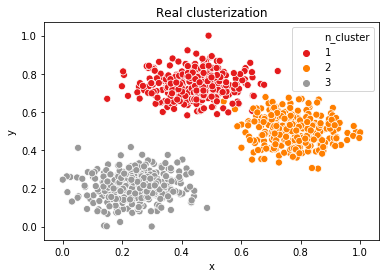

Function 'fit' is done. Elapsed: 1.07 sec.


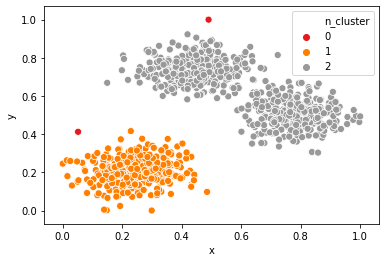

Estimated number of clusters: 2
Estimated number of noise points: 2
Homogeneity: 0.579
Completeness: 0.979
V-measure: 0.727
Adjusted Rand Index: 0.569
Adjusted Mutual Information: 0.727
Silhouette Coefficient: 0.521
min_pts = 5


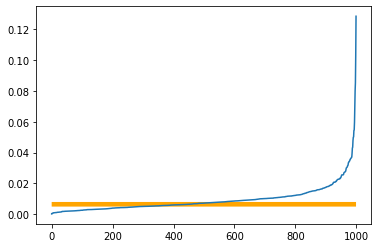

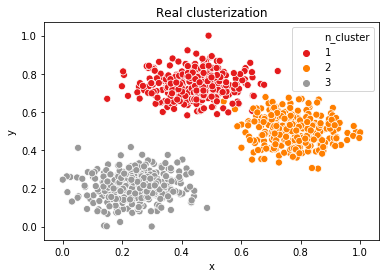

Function 'fit' is done. Elapsed: 1.00 sec.


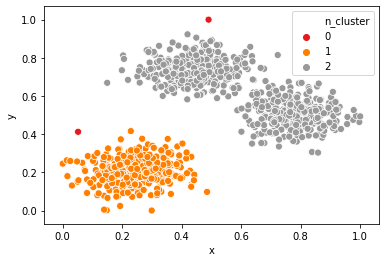

Estimated number of clusters: 2
Estimated number of noise points: 2
Homogeneity: 0.579
Completeness: 0.979
V-measure: 0.727
Adjusted Rand Index: 0.569
Adjusted Mutual Information: 0.727
Silhouette Coefficient: 0.521
min_pts = 7


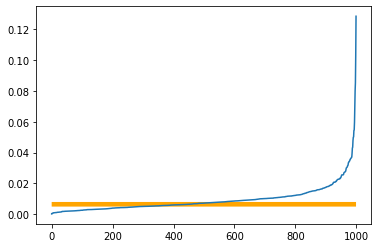

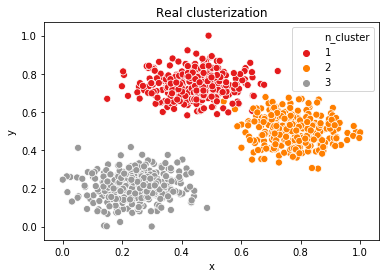

Function 'fit' is done. Elapsed: 1.06 sec.


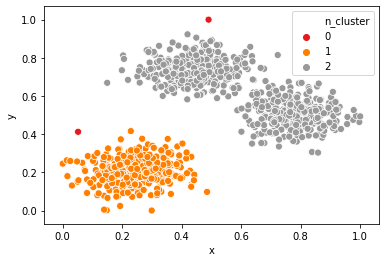

Estimated number of clusters: 2
Estimated number of noise points: 2
Homogeneity: 0.579
Completeness: 0.979
V-measure: 0.727
Adjusted Rand Index: 0.569
Adjusted Mutual Information: 0.727
Silhouette Coefficient: 0.521
min_pts = 9


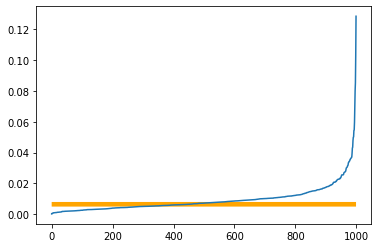

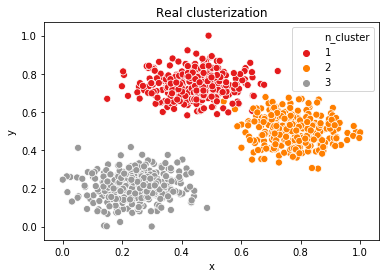

Function 'fit' is done. Elapsed: 1.40 sec.


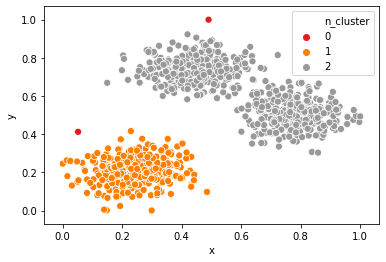

Estimated number of clusters: 2
Estimated number of noise points: 2
Homogeneity: 0.579
Completeness: 0.979
V-measure: 0.727
Adjusted Rand Index: 0.569
Adjusted Mutual Information: 0.727
Silhouette Coefficient: 0.521


In [15]:
eps_list = [0.03, 0.05, 0.1]
min_pts_list = [3, 5, 7, 9]
n_centers = 3
params = {
    'n_samples': 1000,
    'centers': n_centers,
    'cluster_std': 2.,
    'n_features': 2,
    'random_state': RANDOM_STATE,
    'return_centers': False
}
x, y = make_blobs(**params)
x = MinMaxScaler(feature_range=(0, 1)).fit_transform(x)
plot_epsilon_research(x, y1=0.02, y2=0.03)
show_scatter_plot(x, y, title_text='Real clusterization')
random.seed(RANDOM_STATE)

metrics_df = pd.DataFrame(columns=['eps', 'min_pts', 'homogeneity', 'completeness_score', 'v_measure_score', 'adjusted_rand_score', 'adjusted_mutual_info_score', 'silhouette_score'])
i = 0

for eps in eps_list:
    print(f'eps = {eps}')
    for min_pts in min_pts_list:
        print(f'min_pts = {min_pts}')
        # train model
        model = DBSCAN(eps=eps, min_pts=min_pts, distance=DISTANCE)
        model.fit(list(map((lambda x: tuple(x)), x.tolist())))
        clusters = model.clusters_
        data = pd.DataFrame(columns=['n_cluster', 'x', 'y'])
        # add noise clusters
        temp_data = pd.DataFrame(model.noise_clusters_, columns=['x', 'y'])
        temp_data['n_cluster'] = 0
        data = data.append(temp_data, ignore_index=True)
        # add clusters
        for n_cluster in clusters.keys():
            temp_data=pd.DataFrame(clusters[n_cluster], columns=['x', 'y'])
            temp_data['n_cluster'] = n_cluster
            data = data.append(temp_data, ignore_index=True)
        sns.scatterplot(data=data, x='x', y='y', hue='n_cluster', palette="Set1", s=50, legend='full')
        plt.show()
        # calculate metrics
        result_df = pd.DataFrame(x, index=y, columns=['x', 'y']).reset_index()
        result_df = result_df.rename({'index': 'real_cluster'}, axis=1)
        data = data.rename({'n_cluster': 'pred_cluster'}, axis=1)
        result_df = result_df.merge(data, how='inner', on=['x', 'y'])
        del data

        metrics_df_temp = calculate_metrics(n_clusters=len(result_df[result_df['pred_cluster'] != 0]['pred_cluster'].unique()),
                                            n_noise=result_df[result_df['pred_cluster'] == 0].shape[0],
                                            labels_true=result_df['real_cluster'],
                                            labels=result_df['pred_cluster'],
                                            X=result_df[['x', 'y']],
                                            return_dataframe=True)
        
        metrics_df = metrics_df.append(metrics_df_temp)
        metrics_df.iloc[i, 0] = eps
        metrics_df.iloc[i, 1] = min_pts
        i += 1

In [145]:
metrics_df = metrics_df.reset_index().drop('index', axis=1)
metrics_df

eps min_pts  homogeneity  completeness_score  v_measure_score  \
0   0.03       3     0.924309            0.692937         0.792072   
1   0.03       5     0.882759            0.634903         0.738592   
2   0.03       7     0.818399            0.625491         0.709058   
3   0.03       9     0.763040            0.605262         0.675054   
4   0.05       3     0.955665            0.905116         0.929704   
5   0.05       5     0.961504            0.901435         0.930501   
6   0.05       7     0.958395            0.890200         0.923039   
7   0.05       9     0.949404            0.862386         0.903805   
8    0.1       3     0.578539            0.979026         0.727295   
9    0.1       5     0.578539            0.979026         0.727295   
10   0.1       7     0.578539            0.979026         0.727295   
11   0.1       9     0.578539            0.979026         0.727295   

    adjusted_rand_score  adjusted_mutual_info_score  silhouette_score  
0              0.843639                    0.789753          0.077536  
1              0.774299                    0.736035         -0.012499  
2              0.698429                    0.707500          0.186522  
3              0.626314                    0.674264          0.427960  
4              0.959584                    0.929513          0.656370  
5              0.959535                    0.930314          0.660891  
6              0.953496                    0.922834          0.651816  
7              0.937011                    0.903552          0.633666  
8              0.568730                    0.726583          0.521274  
9              0.568730                    0.726583          0.521274  
10             0.568730                    0.726583          0.521274  
11             0.568730                    0.726583          0.521274

In [146]:
metrics_df[metrics_df['homogeneity'] == metrics_df['homogeneity'].max()]

eps min_pts  homogeneity  completeness_score  v_measure_score  \
5  0.05       5     0.961504            0.901435         0.930501   

   adjusted_rand_score  adjusted_mutual_info_score  silhouette_score  
5             0.959535                    0.930314          0.660891

In [147]:
metrics_df[metrics_df['completeness_score'] == metrics_df['completeness_score'].max()]

eps min_pts  homogeneity  completeness_score  v_measure_score  \
8   0.1       3     0.578539            0.979026         0.727295   
9   0.1       5     0.578539            0.979026         0.727295   
10  0.1       7     0.578539            0.979026         0.727295   
11  0.1       9     0.578539            0.979026         0.727295   

    adjusted_rand_score  adjusted_mutual_info_score  silhouette_score  
8               0.56873                    0.726583          0.521274  
9               0.56873                    0.726583          0.521274  
10              0.56873                    0.726583          0.521274  
11              0.56873                    0.726583          0.521274

In [148]:
metrics_df[metrics_df['v_measure_score'] == metrics_df['v_measure_score'].max()]

eps min_pts  homogeneity  completeness_score  v_measure_score  \
5  0.05       5     0.961504            0.901435         0.930501   

   adjusted_rand_score  adjusted_mutual_info_score  silhouette_score  
5             0.959535                    0.930314          0.660891

In [149]:
metrics_df[metrics_df['adjusted_rand_score'] == metrics_df['adjusted_rand_score'].max()]

eps min_pts  homogeneity  completeness_score  v_measure_score  \
4  0.05       3     0.955665            0.905116         0.929704   

   adjusted_rand_score  adjusted_mutual_info_score  silhouette_score  
4             0.959584                    0.929513           0.65637

In [150]:
metrics_df[metrics_df['adjusted_mutual_info_score'] == metrics_df['adjusted_mutual_info_score'].max()]

eps min_pts  homogeneity  completeness_score  v_measure_score  \
5  0.05       5     0.961504            0.901435         0.930501   

   adjusted_rand_score  adjusted_mutual_info_score  silhouette_score  
5             0.959535                    0.930314          0.660891

In [151]:
metrics_df[metrics_df['silhouette_score'] == metrics_df['silhouette_score'].max()]

eps min_pts  homogeneity  completeness_score  v_measure_score  \
5  0.05       5     0.961504            0.901435         0.930501   

   adjusted_rand_score  adjusted_mutual_info_score  silhouette_score  
5             0.959535                    0.930314          0.660891

# Time test (My DBSCAN vs sklearn DBSCAN)

In [11]:
sklearn_DBSCAN_params = {
    'auto_DBSCAN': {
        'algorithm': 'auto',
        'n_jobs': -1
    },
    'ball_tree_DBSCAN': {
        'algorithm': 'ball_tree',
        'n_jobs': -1
    },
    'kd_tree_DBSCAN': {
        'algorithm': 'kd_tree',
        'n_jobs': -1
    },
    'brute_DBSCAN': {
        'algorithm': 'brute',
        'n_jobs': -1
    },
}
model_time_dict = {'my_DBSCAN': []}
for param in sklearn_DBSCAN_params:
    model_time_dict[param] = []
n_samples_list = [500, 1000, 5000, 10000, 20000]
models_list = list(model_time_dict.keys())

In [13]:
eps = 0.5
min_pts = 5
for n_samples in n_samples_list:
    params = {
        'n_samples': n_samples,
        'centers': 10,
        'cluster_std': 1.5,
        'n_features': 2,
        'random_state': 4,
        'return_centers': False
    }
    print(f"n_samples = {n_samples}")
    x, y = make_blobs(**params)
    x = MinMaxScaler(feature_range=(0, 1)).fit_transform(x)
    for method in models_list:
        print(method)
        now_time = time.time()
        if method == 'my_DBSCAN':
            model = DBSCAN(eps=eps, min_pts=min_samples, distance=DISTANCE)
            model.fit(list(map((lambda x: tuple(x)), x.tolist())))
        else:
            model = sklearn_DBSCAN(eps=eps, min_samples=min_samples, **sklearn_DBSCAN_params[method])
            model.fit(x)

        model_time_dict[method].append(time.time() - now_time)      
    print()

n_samples = 500
my_DBSCAN
Function 'fit' is done. Elapsed: 0.16 sec.
auto_DBSCAN
ball_tree_DBSCAN
kd_tree_DBSCAN
brute_DBSCAN

n_samples = 1000
my_DBSCAN
Function 'fit' is done. Elapsed: 0.56 sec.
auto_DBSCAN
ball_tree_DBSCAN
kd_tree_DBSCAN
brute_DBSCAN

n_samples = 5000
my_DBSCAN
Function 'fit' is done. Elapsed: 13.14 sec.
auto_DBSCAN
ball_tree_DBSCAN
kd_tree_DBSCAN
brute_DBSCAN

n_samples = 10000
my_DBSCAN
Function 'fit' is done. Elapsed: 54.25 sec.
auto_DBSCAN
ball_tree_DBSCAN
kd_tree_DBSCAN
brute_DBSCAN

n_samples = 20000
my_DBSCAN
Function 'fit' is done. Elapsed: 235.45 sec.
auto_DBSCAN
ball_tree_DBSCAN
kd_tree_DBSCAN
brute_DBSCAN



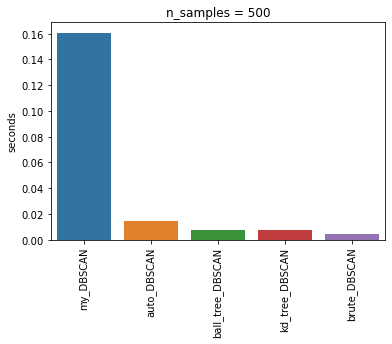

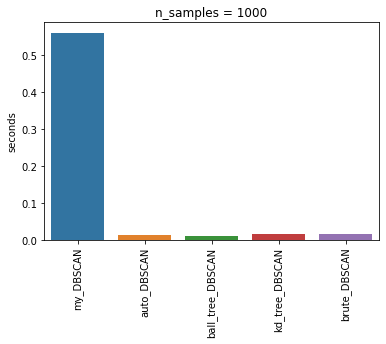

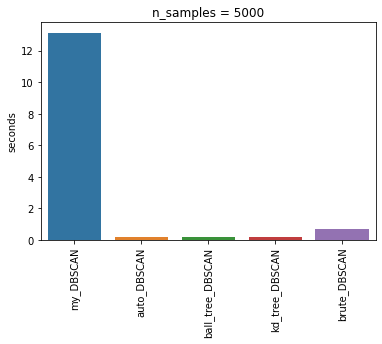

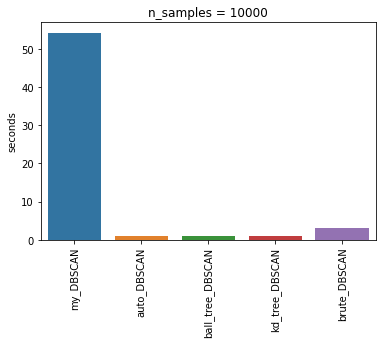

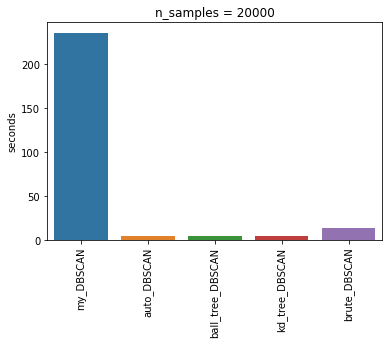

In [14]:
df = pd.DataFrame(model_time_dict)
df.index = n_samples_list
for idx, n_samples in enumerate(n_samples_list):
    plt.title(f'n_samples = {n_samples}')
    sns.barplot(x=df.iloc[idx,:].keys(), y=df.iloc[idx,:].values)
    plt.xticks(rotation='vertical')
    plt.ylabel("seconds")
    plt.show();

In [15]:
model_time_dict

{'my_DBSCAN': [0.1608109474182129,
  0.5619189739227295,
  13.13683533668518,
  54.25510263442993,
  235.45469760894775],
 'auto_DBSCAN': [0.014284133911132812,
  0.013960599899291992,
  0.16453218460083008,
  0.9542291164398193,
  4.48569393157959],
 'ball_tree_DBSCAN': [0.007354021072387695,
  0.01122283935546875,
  0.16728758811950684,
  1.058579444885254,
  4.678816080093384],
 'kd_tree_DBSCAN': [0.007237911224365234,
  0.01409769058227539,
  0.1707746982574463,
  0.9705970287322998,
  4.672801971435547],
 'brute_DBSCAN': [0.004213571548461914,
  0.014414310455322266,
  0.6752557754516602,
  3.1853690147399902,
  13.192272186279297]}

# Time test (sklearn DBSCAN)

In [7]:
eps = 0.5
min_samples = 5
model_time_dict = {}
for param in sklearn_DBSCAN_params:
    model_time_dict[param] = []
n_samples_list = [10000, 20000, 30000, 40000, 50000]
models_list = list(model_time_dict.keys())

for n_samples in n_samples_list:
    params = {
        'n_samples': n_samples,
        'centers': 50,
        'cluster_std': 1.5,
        'n_features': 5,
        'random_state': 4,
        'return_centers': False
    }
    print(f"n_samples = {n_samples}")
    x, y = make_blobs(**params)
    x = MinMaxScaler(feature_range=(0, 1)).fit_transform(x)
    for method in models_list:
        print(method)
        now_time = time.time()
        model = sklearn_DBSCAN(eps=eps, min_samples=min_samples, **sklearn_DBSCAN_params[method])
        model.fit(x)
        model_time_dict[method].append(time.time() - now_time)
    print()

n_samples = 10000
auto_DBSCAN
ball_tree_DBSCAN
kd_tree_DBSCAN
brute_DBSCAN

n_samples = 20000
auto_DBSCAN
ball_tree_DBSCAN
kd_tree_DBSCAN
brute_DBSCAN

n_samples = 30000
auto_DBSCAN
ball_tree_DBSCAN
kd_tree_DBSCAN
brute_DBSCAN

n_samples = 40000
auto_DBSCAN
ball_tree_DBSCAN
kd_tree_DBSCAN
brute_DBSCAN

n_samples = 50000
auto_DBSCAN
ball_tree_DBSCAN
kd_tree_DBSCAN
brute_DBSCAN



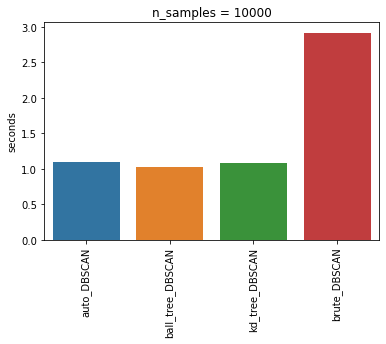

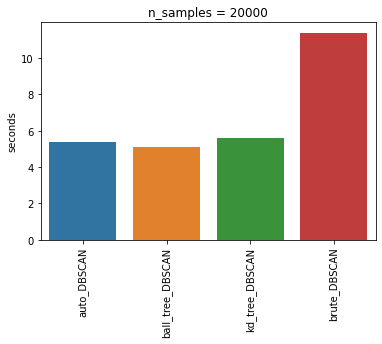

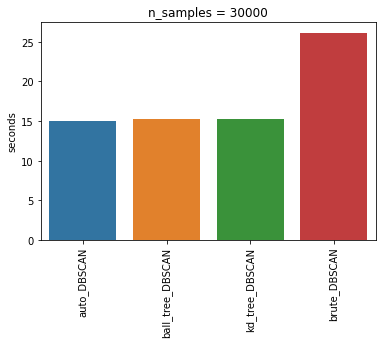

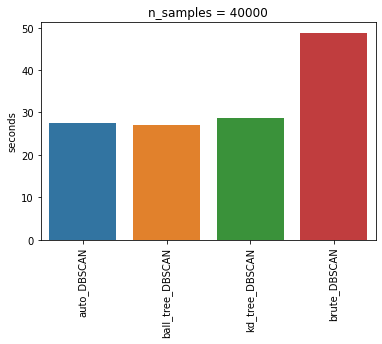

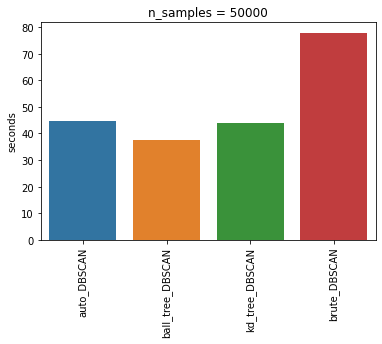

In [8]:
df = pd.DataFrame(model_time_dict)
df.index = n_samples_list
for idx, n_samples in enumerate(n_samples_list):
    plt.title(f'n_samples = {n_samples}')
    sns.barplot(x=df.iloc[idx,:].keys(), y=df.iloc[idx,:].values)
    plt.xticks(rotation='vertical')
    plt.ylabel("seconds")
    plt.show();

In [9]:
model_time_dict

{'auto_DBSCAN': [1.0973801612854004,
  5.368399381637573,
  15.025386810302734,
  27.528310537338257,
  44.765358448028564],
 'ball_tree_DBSCAN': [1.0291478633880615,
  5.080957412719727,
  15.310178756713867,
  27.031939029693604,
  37.51183724403381],
 'kd_tree_DBSCAN': [1.0841095447540283,
  5.603759050369263,
  15.260254621505737,
  28.738673448562622,
  43.952667474746704],
 'brute_DBSCAN': [2.920541286468506,
  11.410104751586914,
  26.180161237716675,
  48.839887380599976,
  77.9666690826416]}